In [130]:
#importing prophet
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import os
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [113]:
df = pd.read_csv('chris-ice_ncf1.csv')
df.head()

,Date,Open,High,Low,Settle,Change,Wave,Volume,Prev. Day Open Interest,EFP Volume,EFS Volume,Block Volume
0,2021-01-07,79.30,81.00,79.30,81.05,1.60,80.15,19.0,1872.0,NaN,NaN,31.0
1,2021-01-06,80.10,80.10,79.50,79.45,-0.90,79.85,15.0,1864.0,NaN,NaN,1.0
2,2021-01-05,81.50,81.50,80.50,80.35,-0.85,80.87,44.0,1849.0,NaN,NaN,94.0
3,2021-01-04,82.25,82.25,81.25,81.20,NaN,81.93,36.0,1778.0,NaN,NaN,94.0
4,2020-12-31,81.30,81.30,80.50,80.50,-1.10,80.81,16.0,1785.0,NaN,NaN,NaN


In [114]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

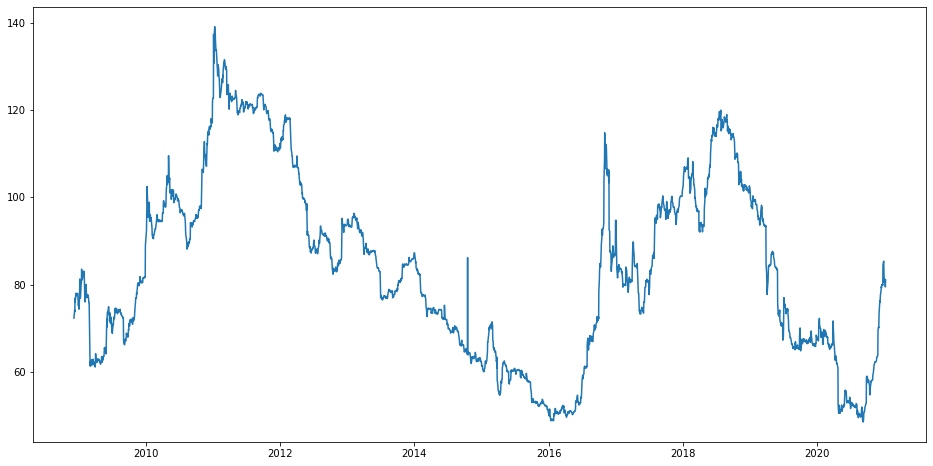

In [115]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Settle'], label='Close Price history')

In [116]:
data = df.sort_index(ascending=True, axis=0)


In [117]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Settle'])


In [118]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Settle'][i] = data['Settle'][i]

In [119]:
new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

In [120]:
new_data.rename(columns={'Settle': 'y', 'Date': 'ds'}, inplace=True)


In [214]:
#train and validation
train = new_data[:2200]
valid = new_data[2200:]

In [253]:
#fit the model

model = Prophet(daily_seasonality=True, growth= 'flat', changepoint_prior_scale=0.5)
model.fit(train)


In [254]:
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-12-05,82.870075,59.368376,111.153112,82.870075,82.870075,2.073856,2.073856,2.073856,-2.414723,...,3.401790,3.401790,3.401790,1.086789,1.086789,1.086789,0.0,0.0,0.0,84.943931
1,2008-12-08,82.870075,56.691543,110.818286,82.870075,82.870075,0.788708,0.788708,0.788708,-2.414723,...,2.261200,2.261200,2.261200,0.942230,0.942230,0.942230,0.0,0.0,0.0,83.658782
2,2008-12-09,82.870075,57.592976,110.716101,82.870075,82.870075,1.679529,1.679529,1.679529,-2.414723,...,3.159083,3.159083,3.159083,0.935169,0.935169,0.935169,0.0,0.0,0.0,84.549604
3,2008-12-10,82.870075,58.052111,111.621613,82.870075,82.870075,1.605004,1.605004,1.605004,-2.414723,...,3.069974,3.069974,3.069974,0.949753,0.949753,0.949753,0.0,0.0,0.0,84.475079
4,2008-12-11,82.870075,58.758024,111.588909,82.870075,82.870075,1.838721,1.838721,1.838721,-2.414723,...,3.267199,3.267199,3.267199,0.986245,0.986245,0.986245,0.0,0.0,0.0,84.708796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,2019-12-27,82.870075,59.743532,113.533522,82.870075,82.870075,4.622999,4.622999,4.622999,-2.414723,...,3.401790,3.401790,3.401790,3.635932,3.635932,3.635932,0.0,0.0,0.0,87.493074
3092,2019-12-28,82.870075,42.528397,95.279872,82.870075,82.870075,-14.011609,-14.011609,-14.011609,-2.414723,...,-15.461088,-15.461088,-15.461088,3.864202,3.864202,3.864202,0.0,0.0,0.0,68.858466
3093,2019-12-29,82.870075,57.930395,110.966615,82.870075,82.870075,1.973181,1.973181,1.973181,-2.414723,...,0.301840,0.301840,0.301840,4.086064,4.086064,4.086064,0.0,0.0,0.0,84.843256
3094,2019-12-30,82.870075,59.481200,115.579020,82.870075,82.870075,4.145707,4.145707,4.145707,-2.414723,...,2.261200,2.261200,2.261200,4.299229,4.299229,4.299229,0.0,0.0,0.0,87.015781


In [255]:
#rmse
forecast_valid = forecast['yhat'][2200:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

22.23413222728752

<ipython-input-256-0102cca35a87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-256-0102cca35a87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = forecast_valid.values


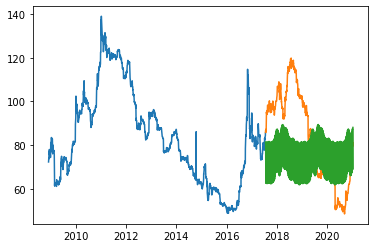

In [256]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])